In [11]:
# 3. 딥러닝 모델을 구성하는 방법
# 1) Sequential API
# 2) Functional API
# 3) Subclassing API

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Input 객체 : 입력 데이터의 모양인 shape 포함/ 예상되는 데이터 유형인 dtype 포함하고,
#              batch_size로 지정/ name 이름 지정 할 수 있다.
keras.Input(shape=(28, 28), dtype=tf.float32, batch_size=16, name='input')

In [12]:
# Dense 레이어 : 완전연결계층(Fully-Connected Layer)으로 노드수(유닛수)를 지정
#                name을 통해 이름을 지정하여 레이어간의 구분이 가능
#                레이어에서 사용할 활성화 함수(activation)를 지정하여 생성하는 것이 가능

layers.Dense(10, activation='relu', name='Dense Layer')

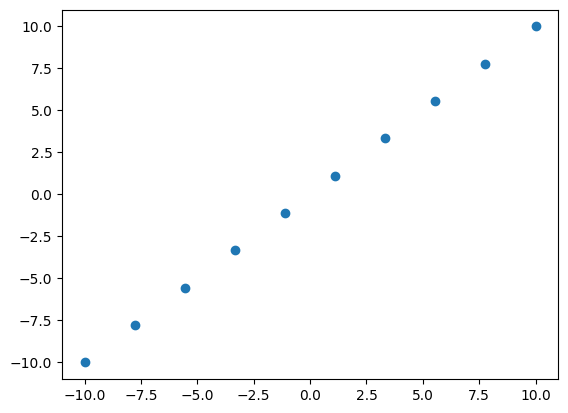

In [13]:
# Activation 레이어 : 활성화 함수는 이전 레이어의 결과값을 변환하여 다른 레이어로 전달하는 역할
#                     선형 활성화 함수(Linear activation function)와 비선형 활성화 함수(Non-linear activation function)로 구분
#                     딥러닝에서는 선형 활성화 함수를 사용하면 다층 구조를 사용하는 의미가 없기 때문에 모델 표현력을 위해서 비선형 활성화 함수 를 사용

import numpy as np
import matplotlib.pyplot as plt

input = np.linspace(-10, 10, 10)
x = np.linspace(-10, 10, 10)
plt.scatter(x, input)
plt.show()

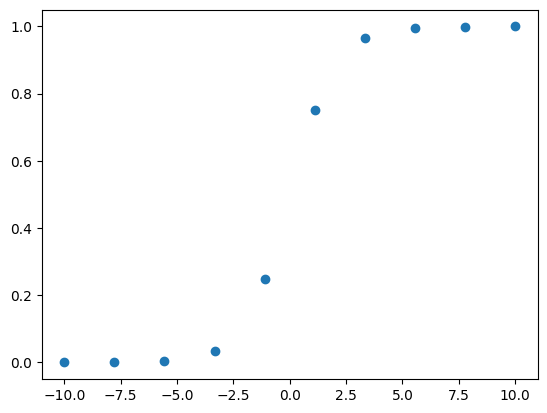

In [14]:
# 시그모이드 함수 : 주로 확률 예측 모델에 자주 사용
#                   0과 1 사이에서 포화(saturate)되는 문제
#                   즉, 입력값이 작아도 출력값이 0 이하가 될 수 없고, 커져도 1 이상이 될 수 없기 때문에 훈련 시간이 오래걸리고,
#                   그래디언트(gradient)가 0에 가까워져서 가중치 업데이트가 발생하지 않게 됩니다.
layer = layers.Activation('sigmoid')
output = layer(input)

plt.scatter(x, output)
plt.show()

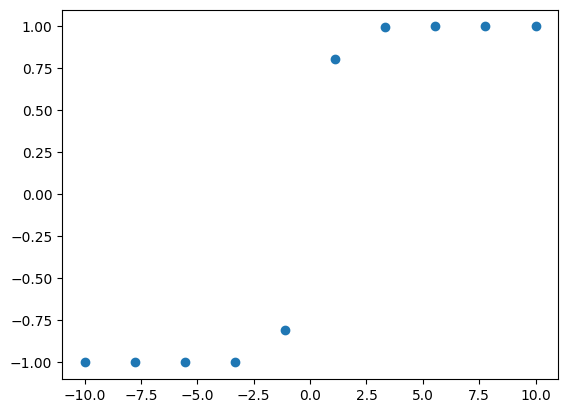

In [15]:
# 하이퍼볼릭 탄젠트(tanh, Hyperbolic tangent) 함수
#                 : 0을 중심으로 -1과 1 사이의 값이 나타나고,
#                 : 시그모이드 함수보다는 빨리 훈련되지만, 여전히 -1과 1 사이에서 포화되는 문제가 있습니다.

layer = layers.Activation('tanh')
output = layer(input)

plt.scatter(x, output)
plt.show()

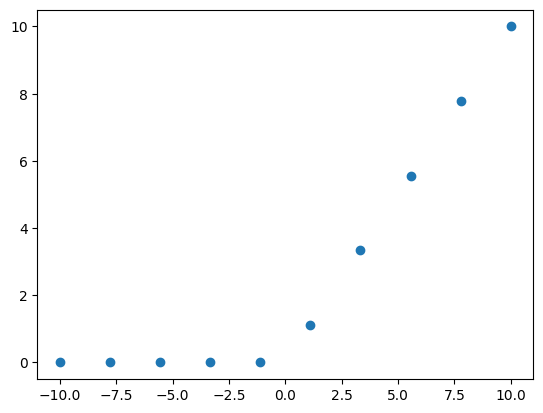

In [17]:
# ReLU 함수 : f(x)=max(0,x)
#             출력값은 0부터 무한대까지의 범위의 값을 가지므로 하이퍼볼릭 탄젠트 함수보다 몇 배는 더 빠르게 훈련
#             학습률(learning rate)이 크면 ReLU를 사용한 노드에서 출력이 0으로만 나온다는 문제

layer = layers.Activation('relu')
output = layer(input)

plt.scatter(x, output)
plt.show()

In [18]:
# Flatten 레이어 : 배치 크기(또는 데이터 크기)를 제외하고 데이터를 1차원 형태로 평평하게 변환
inputs = keras.Input(shape=(28, 28, 1))
layer = layers.Flatten(input_shape=(28, 28, 1))(inputs)
print(layer.shape)

# Q.입력값 (224, 224, 1)를 Flatten 레이어에 넣으면 어떤 크기의 1차원 형태 데이터가 나올까요?
inputs = keras.Input(shape=(224, 224, 1))
layer = layers.Flatten()(inputs)
print(layer.shape)

(None, 784)


3. 딥러닝 모델

3-1) Sequential API 방법
 - 모델이 순차적인 구조로 진행할 때 사용하는 간단한 방법, 다중 입력 및 출력이 존재하는 등의 복잡한 모델을 구성할 수 없습니다.

3-2) Functional API 방법
 - 딥러닝 모델을 복잡하고, 유연하게 구성하는 것이 가능하며, 다중 입출력을 다룰 수 있습니다.

3-3) Subclassing API방법
  - 커스터마이징에 최적화된 방법으로, Model 클래스를 상속받아서 사용하고 모델에 포함되는 다음과 같은 기능을 사용할 수 있습니다.
  fit(): 모델 학습
  - evaluate(): 모델 평가
  - predict(): 모델 예측
  - save(): 모델 저장
  - load(): 모델 불러오기
  - call(): 메소드안에서 원하는 계산 가능


In [19]:
from tensorflow.keras import models, utils

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 28, 300)           8700      
                                                                 
 dense_1 (Dense)             (None, 28, 100)           30100     
                                                                 
 dense_2 (Dense)             (None, 28, 10)            1010      
                                                                 
Total params: 39,810
Trainable params: 39,810
Non-trainable params: 0
_________________________________________________________________


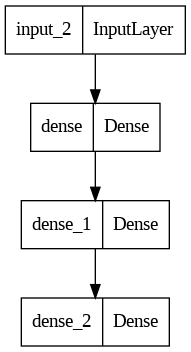

In [20]:
model = models.Sequential()
model.add(layers.Input(shape=(28, 28)))
model.add(layers.Dense(300, activation='relu'))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()
utils.plot_model(model)

model = models.Sequential([layers.Input(shape=(28, 28), name='Input'),
                           layers.Dense(300, activation='relu', name='Dense1'),
                           layers.Dense(100, activation='relu', name='Dense2'),
                           layers.Dense(10, activation='softmax', name='Output')])
model.summary()
utils.plot_model(model)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


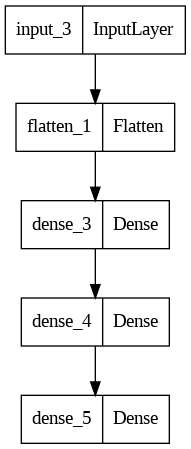

In [21]:
inputs = layers.Input(shape=(28, 28, 1))
x = layers.Flatten(input_shape=(28, 28, 1))(inputs)
x = layers.Dense(300, activation='relu')(x)
x = layers.Dense(100, activation='relu')(x)
x = layers.Dense(10, activation='softmax')(x)

model = models.Model(inputs=inputs, outputs=x)
model.summary()
utils.plot_model(model)

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 28, 28)]     0           []                               
                                                                                                  
 dense_6 (Dense)                (None, 28, 100)      2900        ['input_4[0][0]']                
                                                                                                  
 dense_7 (Dense)                (None, 28, 30)       3030        ['dense_6[0][0]']                
                                                                                                  
 concatenate (Concatenate)      (None, 28, 58)       0           ['input_4[0][0]',                
                                                                  'dense_7[0][0]']          

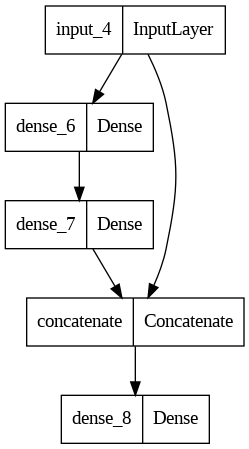

In [22]:
# Functional API를 이용하면 Input 객체를 여러 레이어에서 사용하는 것이 가능
# Concatenate()를 이용하여 Dense 레이어 결과와 Input을 결합

inputs = keras.Input(shape=(28, 28))
hidden1 = layers.Dense(100, activation='relu')(inputs)
hidden2 = layers.Dense(30, activation='relu')(hidden1)
concat = layers.Concatenate()([inputs, hidden2])
output = layers.Dense(1)(concat)

model = models.Model(inputs=[inputs], outputs=[output])
model.summary()
utils.plot_model(model)

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Input_2 (InputLayer)           [(None, 10, 28)]     0           []                               
                                                                                                  
 dense_11 (Dense)               (None, 10, 100)      2900        ['Input_2[0][0]']                
                                                                                                  
 Input_1 (InputLayer)           [(None, 10, 10)]     0           []                               
                                                                                                  
 dense_12 (Dense)               (None, 10, 10)       1010        ['dense_11[0][0]']               
                                                                                            

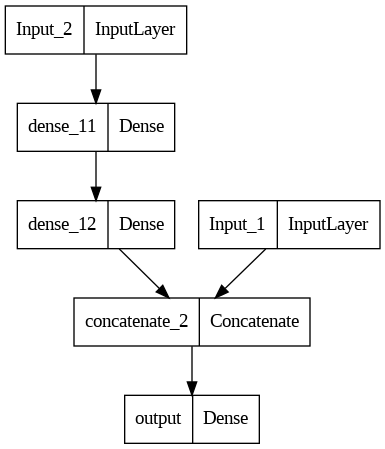

In [24]:
# Functional API를 이용하면 여러 Input 객체를 사용하는 것도 가능
input_1 = keras.Input(shape=(10, 10), name='Input_1')
input_2 = keras.Input(shape=(10, 28), name='Input_2')

hidden1 = layers.Dense(100, activation='relu')(input_2)
hidden2 = layers.Dense(10, activation='relu')(hidden1)
concat = layers.Concatenate()([input_1, hidden2])
output = layers.Dense(1, activation='sigmoid', name='output')(concat)

model = models.Model(inputs=[input_1, input_2], outputs=[output])
model.summary()
utils.plot_model(model)

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ (InputLayer)            [(None, 10, 10)]     0           []                               
                                                                                                  
 dense_13 (Dense)               (None, 10, 100)      1100        ['input_[0][0]']                 
                                                                                                  
 dense_14 (Dense)               (None, 10, 10)       1010        ['dense_13[0][0]']               
                                                                                                  
 main_output (Dense)            (None, 10, 1)        11          ['dense_14[0][0]']               
                                                                                            

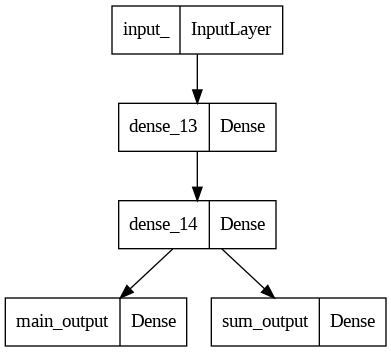

In [25]:
# Functional API를 이용하면 결과를 여러개로 나눠서 사용하는 것도 가능

input_ = keras.Input(shape=(10, 10), name='input_')
hidden1 = layers.Dense(100, activation='relu')(input_)
hidden2 = layers.Dense(10, activation='relu')(hidden1)
output = layers.Dense(1, activation='sigmoid', name='main_output')(hidden2)
sub_out = layers.Dense(1, name='sum_output')(hidden2)

model = models.Model(inputs=[input_], outputs=[output, sub_out])
model.summary()
utils.plot_model(model)

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 10, 28)]     0           []                               
                                                                                                  
 dense_15 (Dense)               (None, 10, 100)      2900        ['input_2[0][0]']                
                                                                                                  
 input_1 (InputLayer)           [(None, 10, 10)]     0           []                               
                                                                                                  
 dense_16 (Dense)               (None, 10, 10)       1010        ['dense_15[0][0]']               
                                                                                            

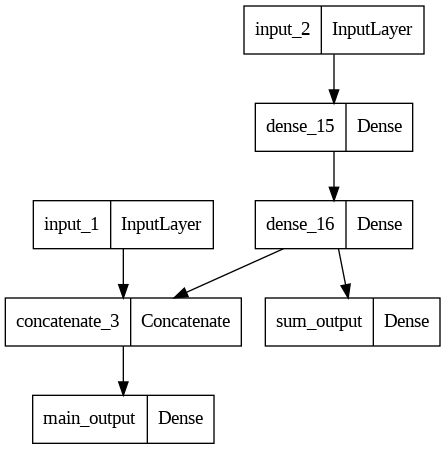

In [26]:
# Functional API를 이용하여 다중 입력과 다중 출력이 가능한 모델

input_1 = keras.Input(shape=(10, 10), name='input_1')
input_2 = keras.Input(shape=(10, 28), name='input_2')
hidden1 = layers.Dense(100, activation='relu')(input_2)
hidden2 = layers.Dense(10, activation='relu')(hidden1)
concat = layers.Concatenate()([input_1, hidden2])
output = layers.Dense(1, activation='sigmoid', name='main_output')(concat)
sub_out = layers.Dense(1, name='sum_output')(hidden2)

model = models.Model(inputs=[input_1, input_2], outputs=[output, sub_out])
model.summary()
utils.plot_model(model)

In [27]:
# 서브클래싱(Subclassing) 방법은 커스터마이징에 최적화된 방법으로,
# Model 클래스를 상속받아서 사용하고 모델에 포함되는 다음과 같은 기능을 사용
# Functional API로도 구현할 수 없는 모델들도 구현이 가능하지만, 객체지향 프로그래밍(Object-oriented Programming)에 익숙해야 합니다.

# Subclassing API의 예시
class MyModel(models.Model):
  def __init__(self, units=30, activation='relu', **kwargs):
    super(MyModel, self).__init__(**kwargs)
    self.dense_layer1 = layers.Dense(300, activation=activation)
    self.dense_layer2 = layers.Dense(100, activation=activation)
    self.dense_layer3 = layers.Dense(units, activation=activation)
    self.output_layer = layers.Dense(10, activation='softmax')

  def call(self, inputs):
    x = self.dense_layer1(inputs)
    x = self.dense_layer2(x)
    x = self.dense_layer3(x)
    x = self.output_layer(x)
    return x

In [28]:
class YourModel(models.Model):
  def __init__(self, **kwargs):
    super(YourModel, self).__init__(**kwargs)
    # Flatten 레이어를 쌓으세요.
    self.flat_layer = layers.Flatten(input_shape=(100, 100, 3))

    # Unit의 수는 400, 활성화함수는 ReLU를 사용하는 Dense 레이어를 쌓으세요.
    self.dense_layer1 = layers.Dense(400, activation='relu')

    # Unit의 수는 200, 활성화함수는 ReLU를 사용하는 Dense 레이어를 쌓으세요.
    self.dense_layer2 = layers.Dense(200, activation='relu')

    # Unit의 수는 100, 활성화함수는 Softmax를 사용하는 Dense 레이어를 쌓으세요.
    self.output_layer = layers.Dense(100, activation='softmax')

  def call(self, inputs):
    # Flatten 레이어를 통과한 뒤 Dense 레이어를 400 -> 200 -> 100 순으로 통과하도록 쌓으세요.
    x = self.flat_layer(inputs)
    x = self.dense_layer1(x)
    x = self.dense_layer2(x)
    x = self.output_layer(x)
    return x

# (100, 100, 3) 형태를 가진 임의의 텐서를 생성해줍니다.
data = tf.random.normal([100, 100, 3])
# 데이터는 일반적으로 batch 단위로 들어가기 때문에 batch 차원을 추가해주겠습니다.
data = tf.reshape(data, (-1, 100, 100, 3))
model = YourModel()
model(data)

model.summary()

Model: "your_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         multiple                  0         
                                                                 
 dense_17 (Dense)            multiple                  12000400  
                                                                 
 dense_18 (Dense)            multiple                  80200     
                                                                 
 dense_19 (Dense)            multiple                  20100     
                                                                 
Total params: 12,100,700
Trainable params: 12,100,700
Non-trainable params: 0
_________________________________________________________________


4. 딥러닝 모델 학습
 4-2. 손실 함수(Loss Function)
  : 손실함수는 학습이 진행되면서 해당 과정이 얼마나 잘 되고 있는지 나타내는 지표로서 모델이 훈련되는 동안 최소화될 값으로 주어진 문제에 대한 성공 지표가 됩니다. 손실 함수에 따른 결과를 통해 파라미터를 조정하며 학습이 진행됩니다. 손실함수는 최적화 이론에서 최소화 하고자 하는 함수로 미분 가능한 함수를 사용합니다.

* keras에서 제공되는 주요 손실함수 : 클래스가 배타적 방
 - sparse_categorical_cross_entropy
 - categorical_cross_entropy : 클래스가 원핫인코딩일때
 - binary_cross_entropy : 이진분류 수행할때

* 평균절대오차(Mean Absolute Error, MAE)
 - |실제값 - 예측값| 총합의 평균
 - 이상치에 더 강건하다. 오차가 매우 크더라도(outlier) 제곱항으로 영향을 미치는 것이 아니라 차이의 절대값만큼만 영향을 미치기 때문에 MSE에 비해 상대적으로 이상치에 더 강건합니다.
  - 일반적으로 회귀(Regression)에 많이 사용하는 손실함수

* 평균제곱오차(Mean Squared Error, MSE)
 - (실제값 - 예측값)**2 제곱의 총합의 평균

* 원-핫 인코딩(One-Hot Encoding)
 - 범주형 변수를 표현할 때
 - 정답인 레이블만 1이고, 나머지는 0처리

* 교차 엔트로피 오차(Cross Entropy Error, CEE)
 - 실제값*log예측값의 총합의 마이너스
 - 이진분류 또는 다중 클래스 분류에 주로 사용
 - 오차는 소프트맥스 결과와 원핫인코딩 사이의 출력간 거리를 비교
  - 정답을 맞추면 오차가 0, 그 차이가 플수록 무한히 커짐

Q. 다중 분류 신경망에서 소프트맥스를 통해 나온 각 클래스에 대한 출력값이 0.6(정답), 0.1(오답), 0.3(오답)일 때 교차 엔트로피 오차값은 얼마일까요?

=> 정답 레이블은 원-핫 인코딩으로 정답인 인덱스에만 1이고, 나머지는 모두 0입니다.
따라서 교차 엔트로피 오차값은 0.51이 됩니다.
(-1 * log0.6) + (-0 *  log0.1) +
(-0 *  log0.3) = 0.51

Q. 2개의 클래스를 분류하는 문제에서 1번이 정답일 확률이 0.8로 나왔을 때, 실제로 1번이 정답이었을 경우와 2번이 정답이었을 경우 교차 크로스 엔트로피 값은 각각 얼마일까요?

=> 2개의 클래스를 분류하는 문제에서 1번이 정답일 확률이 0.8이고, 실제로 정답이 맞다면 다음과 같이 나타낼 수 있습니다.
(-1 * -log0.8) + (-0 *  log0.2) = 0.22
=> 반대로, 실제로 정답이 2번이었다면, 식은 다음과 같이 나타낼 수 있습니다.
(-0 * -log0.8) + (-1 *  log0.2) = 1.61

4-3. 옵티마이저(Optimizer)와 지표

Q. 지금까지 배운 개념들을 종합해 딥러닝의 학습은 어떤 식으로 이뤄지는지 적어주세요.

=> 먼저 데이터셋을 입력 X와 실제 정답(레이블)인 Y로 구분합니다.
입력 데이터는 연속된 레이어로 구성된 네트워크(모델)를 통해 결과로 예측 Y'을 출력합니다.
손실 함수는 모델이 예측한 Y'과 실제 정답인
Y와 비교하여 얼마나 차이가 나는지 측정하는 손실 값을 계산합니다.
옵티마이저는 손실 값을 사용하여 모델의 가중치를 업데이트하는 과정을 수행합니다.
모델이 새롭게 예측한 Y'과 실제 정답인
Y의 차이를 측정하는 손실 값을 계산하는 과정을 반복합니다.
계산한 손실값을 최소화하도록 옵티마이저가 동작하는 것이 딥러닝 모델 학습입니다.

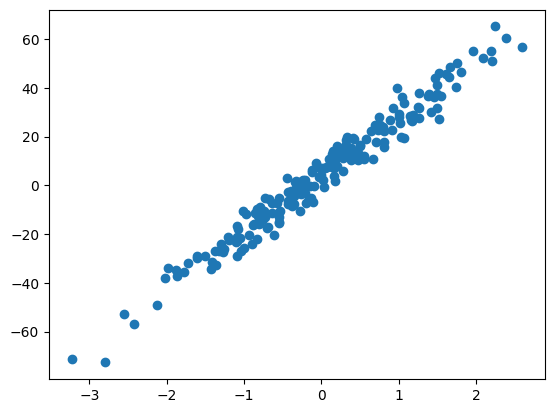

In [29]:
# 데이터 생성
# n_samples=200, n_features=1
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=200, n_features=1,
                       bias=5.0, noise=5.0, random_state=123)
y = np.expand_dims(y, axis=1)

plt.scatter(X, y)
plt.show()

In [30]:
# 데이터를 학습용 데이터셋(x_train, y_train), 테스트용 데이터셋(x_test, y_test)으로 구분
# n_samples=200, n_features=1 중에서 20%를 테스트 데이터셋으로

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=123)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(160, 1) (160, 1)
(40, 1) (40, 1)


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


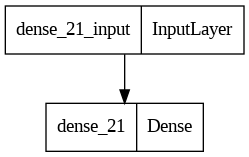

In [32]:
# 모델 생성
# 딥러닝을 사용하는데 필요한 라이브러리인 Tensorflow와 keras를 임포트

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers, optimizers, utils

# 모델은 Sequential()을 이용
# Dense 레이어 하나 추가, 레이어의 유닛수는 1개,
# activation은 선형 회귀이니 'linear'로 지정하며,
# input_shape은 (1,) 으로 1차원 모양으로 입력 모양을 가집니다.
# 최종 모델의 구조를 summary() 함수를 통해 확인해봅니다.
model = keras.Sequential()
model.add(layers.Dense(1, activation='linear', input_shape=(1,)))
model.summary()
utils.plot_model(model)

In [33]:
# 모델 학습
# 딥러닝 모델의 학습 진행 방식을 결정하는 옵티마이저(optimizer)로 SGD(Stochastic Gradient Descent) 를 사용
# compile() 함수를 통해서 손실 함수(loss function), 옵티마이저(optimizer), 지표(metrics)를 지정
# 모델 학습을 진행하기위해 fit() 함수를 호출합니다.
# 학습을 위해 x_train과 y_train를 지정하고, 학습 반복 횟수인 epochs를 40으로 지정
optimizer = optimizers.SGD()
model.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse'])
history = model.fit(x_train, y_train, epochs=40)

Epoch 1/40
5/5 [==============================] - 0s 4ms/step - loss: 586.4242 - mae: 19.4430 - mse: 586.4242
Epoch 2/40
5/5 [==============================] - 0s 2ms/step - loss: 471.4861 - mae: 17.4590 - mse: 471.4861
Epoch 3/40
5/5 [==============================] - 0s 2ms/step - loss: 379.5621 - mae: 15.6407 - mse: 379.5621
Epoch 4/40
5/5 [==============================] - 0s 3ms/step - loss: 306.6219 - mae: 14.0665 - mse: 306.6219
Epoch 5/40
5/5 [==============================] - 0s 2ms/step - loss: 248.4342 - mae: 12.6499 - mse: 248.4342
Epoch 6/40
5/5 [==============================] - 0s 3ms/step - loss: 202.1536 - mae: 11.4059 - mse: 202.1536
Epoch 7/40
5/5 [==============================] - 0s 3ms/step - loss: 165.4674 - mae: 10.3088 - mse: 165.4674
Epoch 8/40
5/5 [==============================] - 0s 2ms/step - loss: 136.0897 - mae: 9.3657 - mse: 136.0897
Epoch 9/40
5/5 [==============================] - 0s 2ms/step - loss: 112.5941 - mae: 8.4958 - mse: 112.5941
Epoch 10/40


In [ ]:
# 모델이 학습하면서 각 epoch 마다 저장한 mae와 mse 지표를 차트를 통해서 확인

plt.plot(history.history['mae'])
plt.plot(history.history['mse'])
plt.xlabel('Epoch')
plt.legend(['mae', 'mse'])
plt.show();

In [34]:
# 모델 평가
# 모델의 평가를 위해 evaluate() 함수를 이용하여 데이터셋인 x_test, y_test에 대해서 지표인 mae와 mse를 확인

model.evaluate(x_test, y_test)

2/2 [==============================] - 0s 8ms/step - loss: 21.9174 - mae: 3.9881 - mse: 21.9174


[21.91739273071289, 3.9880576133728027, 21.91739273071289]

In [ ]:
# 모델 예측
# 학습된 모델을 통해 입력 데이터 X에 대한 예측값을 predict()를 통해 결과로 받아옵니다.
# 실제 데이터의 결과값 y와 모델의 예측 결과인 result를 살펴봅니다.

result = model.predict(X)

plt.scatter(X, y)
plt.plot(X, result, 'r')
plt.show()

In [36]:
# 딥러닝 모델에서 사용한 레이어를 layers 확인
model.layers

# 모델의 0번째 레이어인 layers[0]를 가져와서 layer.name으로 레이어의 이름을 확인
layer = model.layers[0]
print(layer.name)
layer = model.get_layer('dense')
print(layer.name)

# 레이어에서 사용하는 가중치(weights)와 바이어스(biases)를 get_weights() 함수를 통해서 얻을 수 있습니다.
weights, biases = layer.get_weights()
print(weights)
print(biases)

# 딥러닝 모델에서 학습된 가중치(weights)와 바이어스(biases)를 통해 선형회귀식을 np.array(weights * X + biases)로 표현할 수 있습니다.
plt.scatter(X, y)
plt.plot(X, np.array(weights * X + biases), 'r')
plt.show()

dense_21


ValueError: ignored